In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== TOGO SOLAR DATA ANALYSIS ===")

=== TOGO SOLAR DATA ANALYSIS ===


In [2]:
# Load data (adjust filename as needed)
df = pd.read_csv(r'C:\Users\admin\solar-challenge-week0\data\togo-dapaong_qc.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Convert timestamp and sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

Dataset loaded: 525600 rows, 19 columns


In [3]:
print("1. COMPREHENSIVE DATA PROFILING")
# 1.1 Basic Dataset Information
print("\n📊 BASIC DATASET INFORMATION:")
print(f"• Date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"• Time span: {(df['Timestamp'].max() - df['Timestamp'].min()).days} days")
print(f"• Columns: {list(df.columns)}")

1. COMPREHENSIVE DATA PROFILING

📊 BASIC DATASET INFORMATION:
• Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00
• Time span: 364 days
• Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [4]:
# 1.2 Data Types and Basic Info
print("\n📝 DATA TYPES AND STRUCTURE:")
print(df.info())

# 1.3 Summary Statistics
print("\n📈 SUMMARY STATISTICS:")
numerical_cols = [col for col in ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'PW', 'RH'] if col in df.columns]
summary_stats = df[numerical_cols].describe()
print(summary_stats)


📝 DATA TYPES AND STRUCTURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 n

In [5]:
# 1.4 Missing Values Analysis
print("\n🔍 MISSING VALUES ANALYSIS:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
print(missing_report)


🔍 MISSING VALUES ANALYSIS:
               Missing_Count  Missing_Percentage
Timestamp                  0                 0.0
GHI                        0                 0.0
DNI                        0                 0.0
DHI                        0                 0.0
ModA                       0                 0.0
ModB                       0                 0.0
Tamb                       0                 0.0
RH                         0                 0.0
WS                         0                 0.0
WSgust                     0                 0.0
WSstdev                    0                 0.0
WD                         0                 0.0
WDstdev                    0                 0.0
BP                         0                 0.0
Cleaning                   0                 0.0
Precipitation              0                 0.0
TModA                      0                 0.0
TModB                      0                 0.0
Comments              525600             

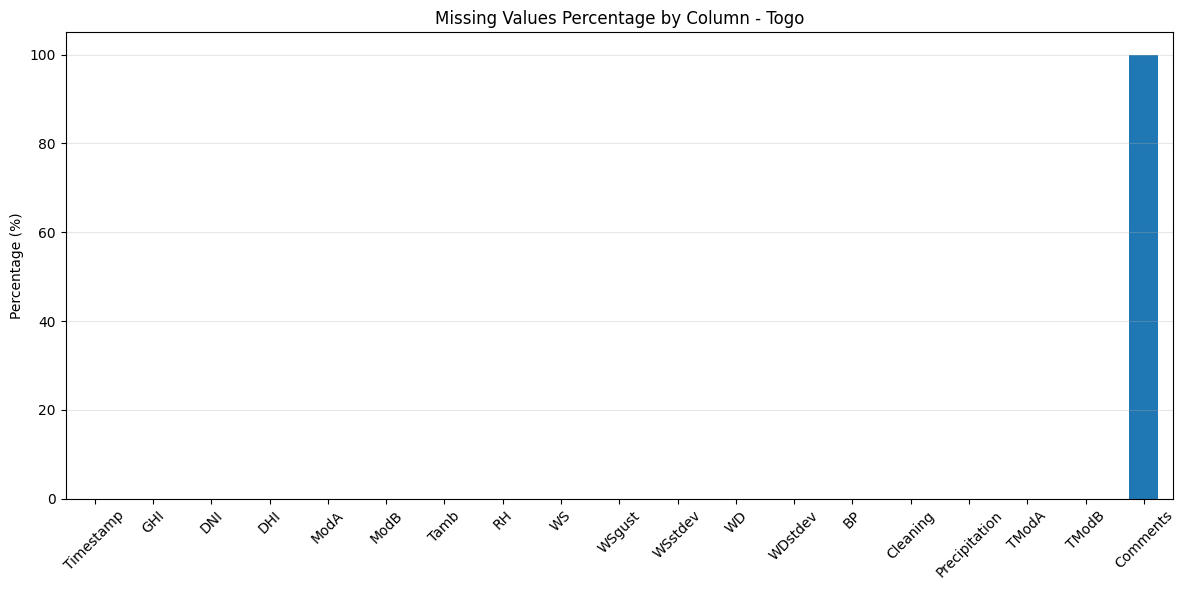

In [6]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_report['Missing_Percentage'].plot(kind='bar')
plt.title('Missing Values Percentage by Column - Togo')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
print("2. OUTLIER DETECTION (Z-score > 3)")

def detect_and_handle_outliers(data, columns, z_threshold=3):
    """
    Detect and handle outliers using Z-score method
    """
    data_clean = data.copy()
    outliers_info = {}
    
    for col in columns:
        if col in data.columns and data[col].dtype in ['float64', 'int64']:
            # Remove NaN for Z-score calculation
            clean_vals = data[col].dropna()
            
            if len(clean_vals) > 0:
                z_scores = np.abs(stats.zscore(clean_vals))
                outlier_indices = np.where(z_scores > z_threshold)[0]
                original_indices = clean_vals.index[outlier_indices]
                
                outliers_info[col] = {
                    'count': len(outlier_indices),
                    'percentage': (len(outlier_indices) / len(clean_vals)) * 100,
                    'max_z_score': np.max(z_scores) if len(z_scores) > 0 else 0,
                    'indices': original_indices.tolist()
                }
                
                # Handle outliers by imputing with median
                median_val = clean_vals.median()
                data_clean.loc[original_indices, col] = median_val
                
                print(f"• {col}: {len(outlier_indices)} outliers ({outliers_info[col]['percentage']:.2f}%) - Max Z-score: {outliers_info[col]['max_z_score']:.2f}")
    
    return data_clean, outliers_info


2. OUTLIER DETECTION (Z-score > 3)


In [8]:
# Apply outlier detection and handling
print("Outlier Detection Results:")
df_clean, outliers_report = detect_and_handle_outliers(df, numerical_cols)



Outlier Detection Results:
• GHI: 305 outliers (0.06%) - Max Z-score: 3.70
• DNI: 1062 outliers (0.20%) - Max Z-score: 3.40
• DHI: 3415 outliers (0.65%) - Max Z-score: 4.40
• Tamb: 0 outliers (0.00%) - Max Z-score: 2.87
• WS: 3510 outliers (0.67%) - Max Z-score: 9.39
• RH: 0 outliers (0.00%) - Max Z-score: 1.80


3. DATA CLEANING IMPACT ANALYSIS


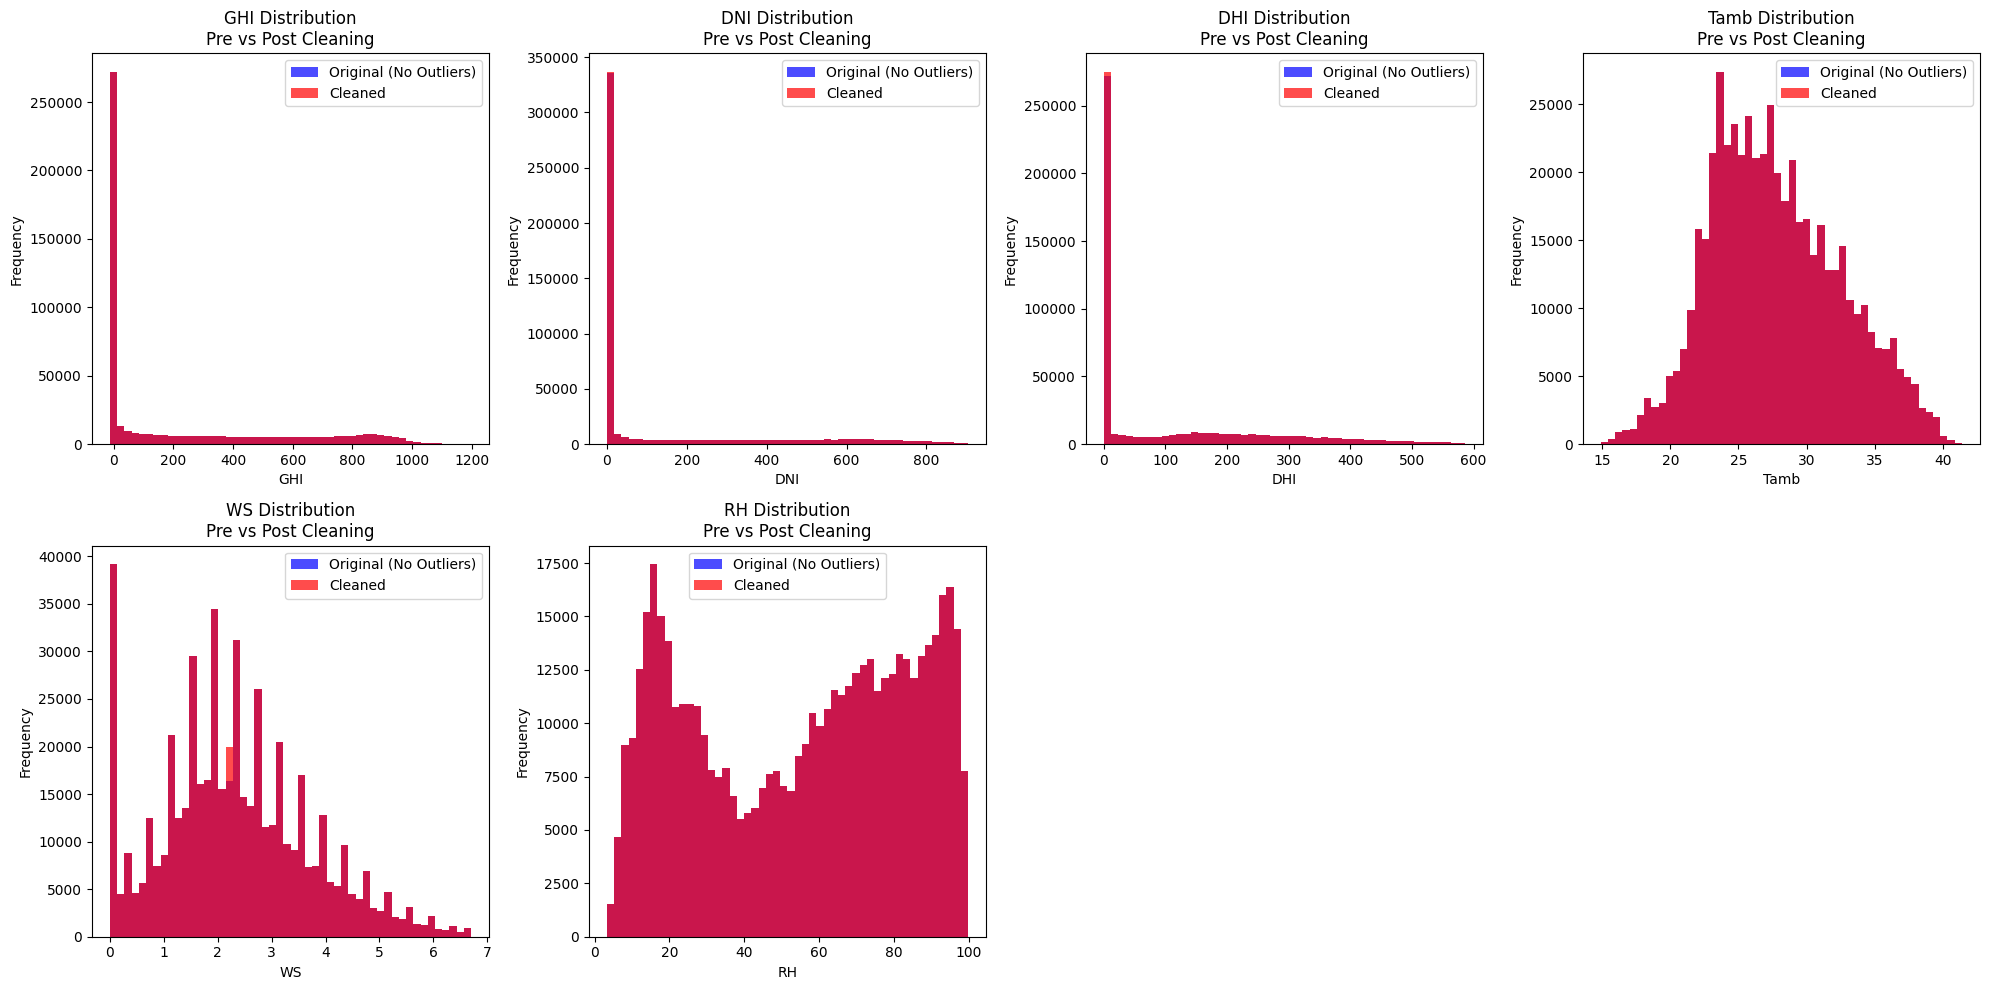

In [9]:
print("3. DATA CLEANING IMPACT ANALYSIS")

# Compare original vs cleaned data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

key_metrics = [col for col in ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'PW', 'RH'] if col in df.columns]

for i, col in enumerate(key_metrics):
    # Original data (without outliers for fair comparison)
    original_clean = df[col].dropna()
    z_scores_orig = np.abs(stats.zscore(original_clean))
    original_no_outliers = original_clean[z_scores_orig <= 3]
    
    # Cleaned data
    cleaned_vals = df_clean[col].dropna()
    
    axes[i].hist(original_no_outliers, bins=50, alpha=0.7, label='Original (No Outliers)', color='blue')
    axes[i].hist(cleaned_vals, bins=50, alpha=0.7, label='Cleaned', color='red')
    axes[i].set_title(f'{col} Distribution\nPre vs Post Cleaning')
    axes[i].legend()
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot if any
if len(key_metrics) < 8:
    for i in range(len(key_metrics), 8):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [10]:
print("4. TIME SERIES ANALYSIS")

# 4.1 Daily patterns
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Day'] = df_clean['Timestamp'].dt.day


4. TIME SERIES ANALYSIS


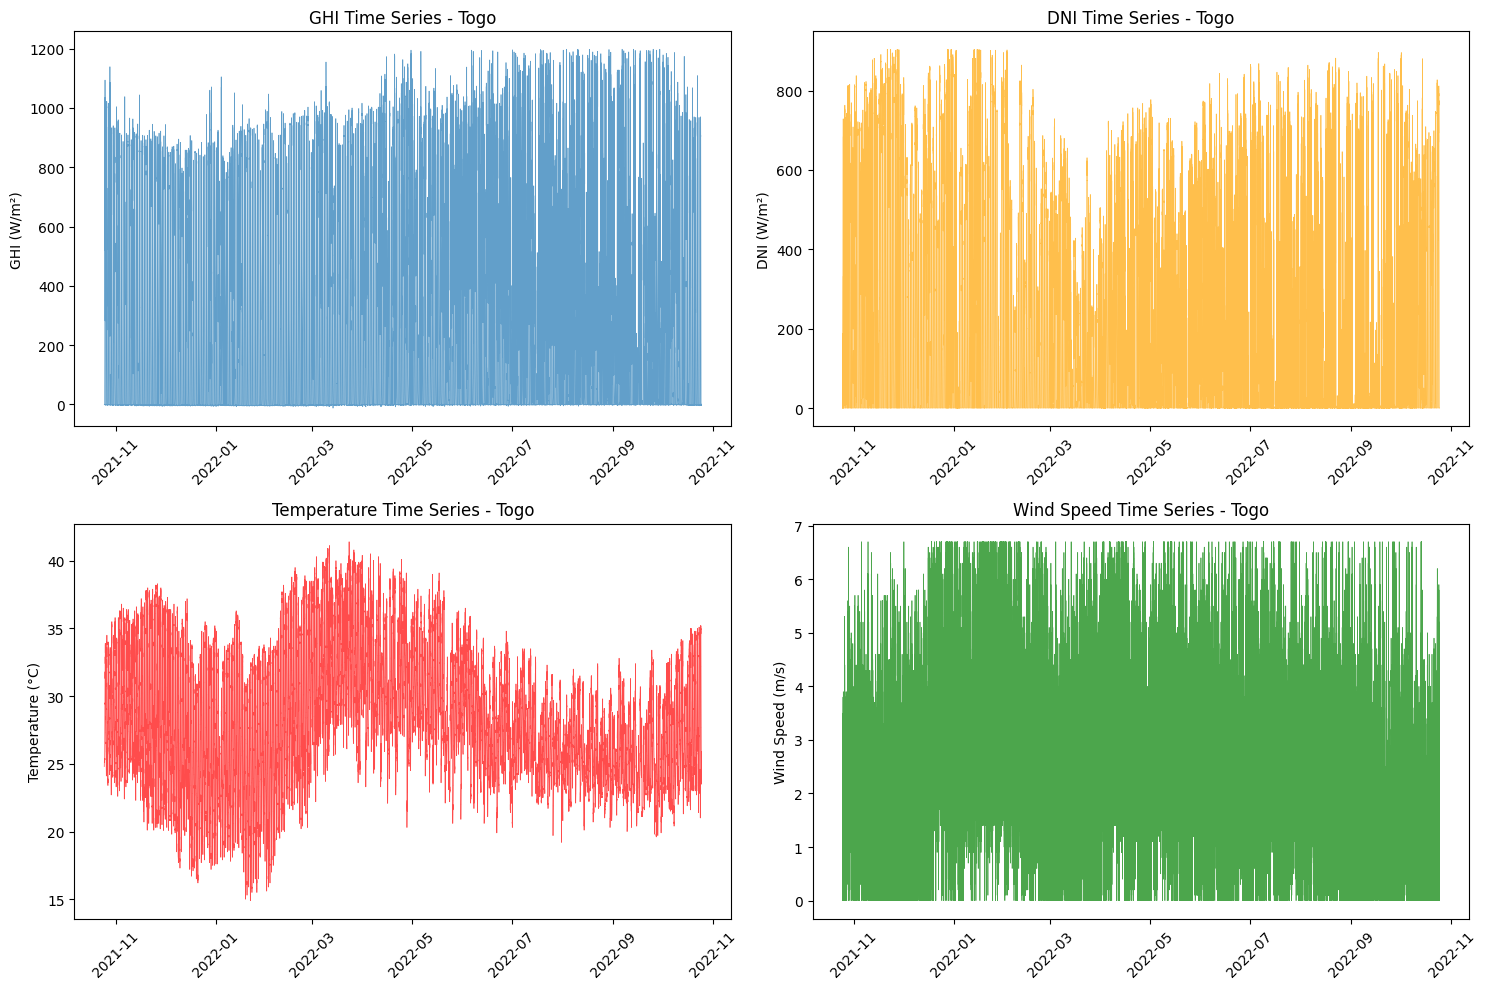

In [11]:

# Plot time series for key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# GHI over time
axes[0].plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7, linewidth=0.5)
axes[0].set_title('GHI Time Series - Togo')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].tick_params(axis='x', rotation=45)

# DNI over time
axes[1].plot(df_clean['Timestamp'], df_clean['DNI'], alpha=0.7, linewidth=0.5, color='orange')
axes[1].set_title('DNI Time Series - Togo')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].tick_params(axis='x', rotation=45)

# Temperature over time
axes[2].plot(df_clean['Timestamp'], df_clean['Tamb'], alpha=0.7, linewidth=0.5, color='red')
axes[2].set_title('Temperature Time Series - Togo')
axes[2].set_ylabel('Temperature (°C)')
axes[2].tick_params(axis='x', rotation=45)

# Wind speed over time
axes[3].plot(df_clean['Timestamp'], df_clean['WS'], alpha=0.7, linewidth=0.5, color='green')
axes[3].set_title('Wind Speed Time Series - Togo')
axes[3].set_ylabel('Wind Speed (m/s)')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

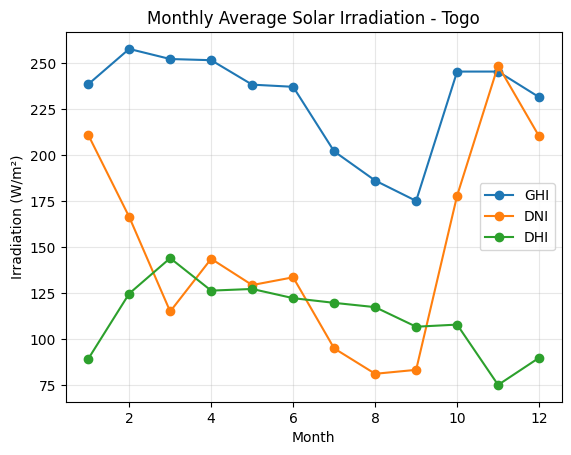

In [12]:
# 4.2 Monthly aggregation
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
monthly_avg[['GHI', 'DNI', 'DHI']].plot(kind='line', marker='o')
plt.title('Monthly Average Solar Irradiation - Togo')
plt.ylabel('Irradiation (W/m²)')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

5. CORRELATION ANALYSIS


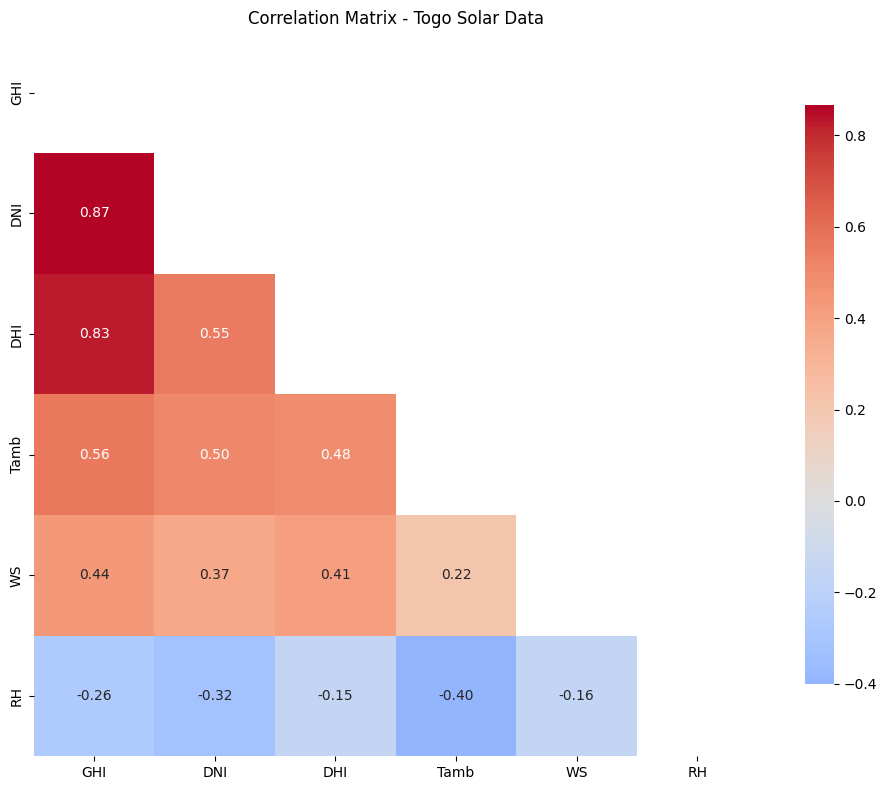

In [13]:
print("5. CORRELATION ANALYSIS")
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Togo Solar Data')
plt.tight_layout()
plt.show()

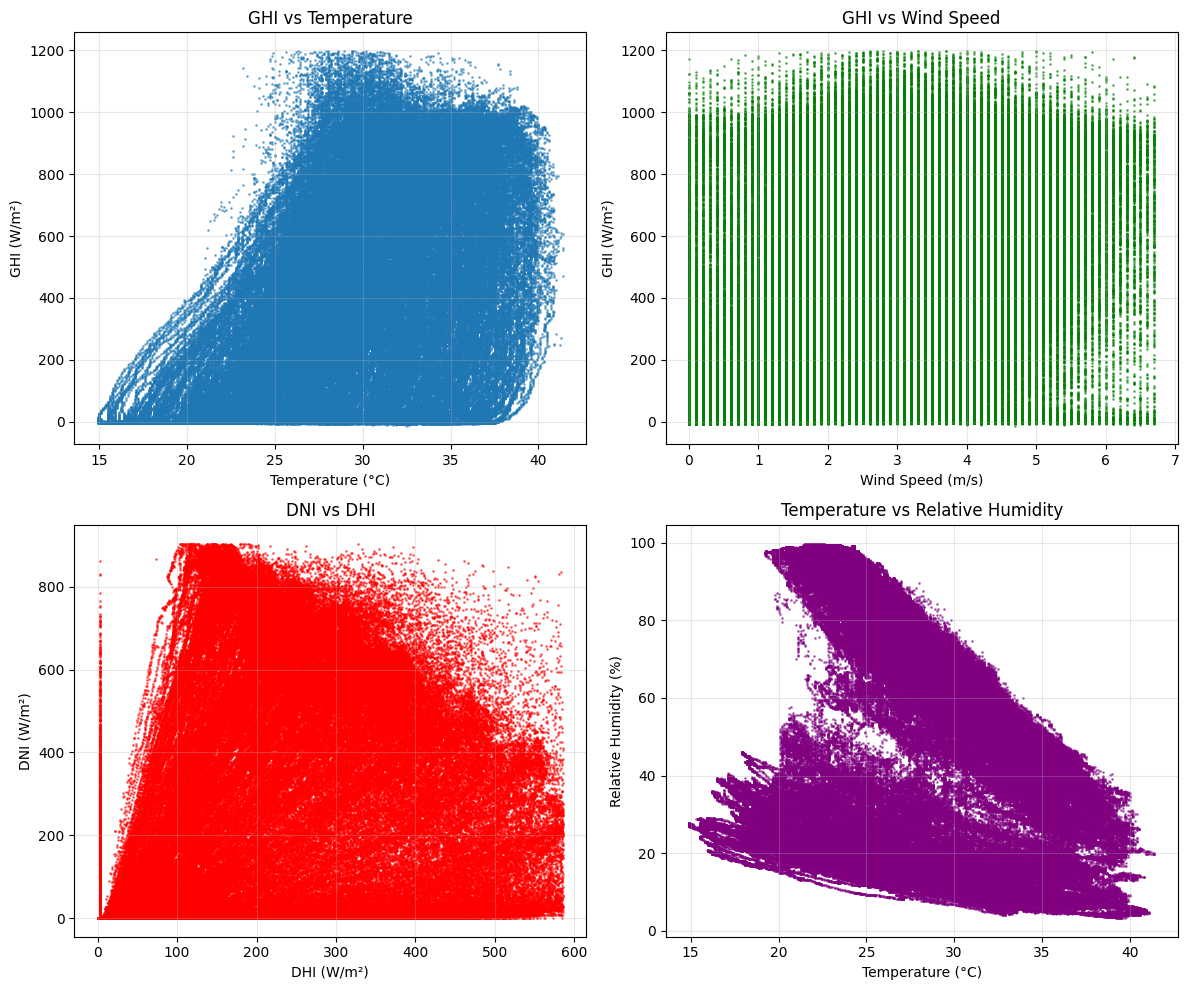

In [14]:

# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# GHI vs Temperature
axes[0].scatter(df_clean['Tamb'], df_clean['GHI'], alpha=0.5, s=1)
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_title('GHI vs Temperature')
axes[0].grid(True, alpha=0.3)

# GHI vs Wind Speed
axes[1].scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5, s=1, color='green')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('GHI vs Wind Speed')
axes[1].grid(True, alpha=0.3)

# DNI vs DHI
axes[2].scatter(df_clean['DHI'], df_clean['DNI'], alpha=0.5, s=1, color='red')
axes[2].set_xlabel('DHI (W/m²)')
axes[2].set_ylabel('DNI (W/m²)')
axes[2].set_title('DNI vs DHI')
axes[2].grid(True, alpha=0.3)

# Temperature vs Relative Humidity
axes[3].scatter(df_clean['Tamb'], df_clean['RH'], alpha=0.5, s=1, color='purple')
axes[3].set_xlabel('Temperature (°C)')
axes[3].set_ylabel('Relative Humidity (%)')
axes[3].set_title('Temperature vs Relative Humidity')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. DISTRIBUTION ANALYSIS


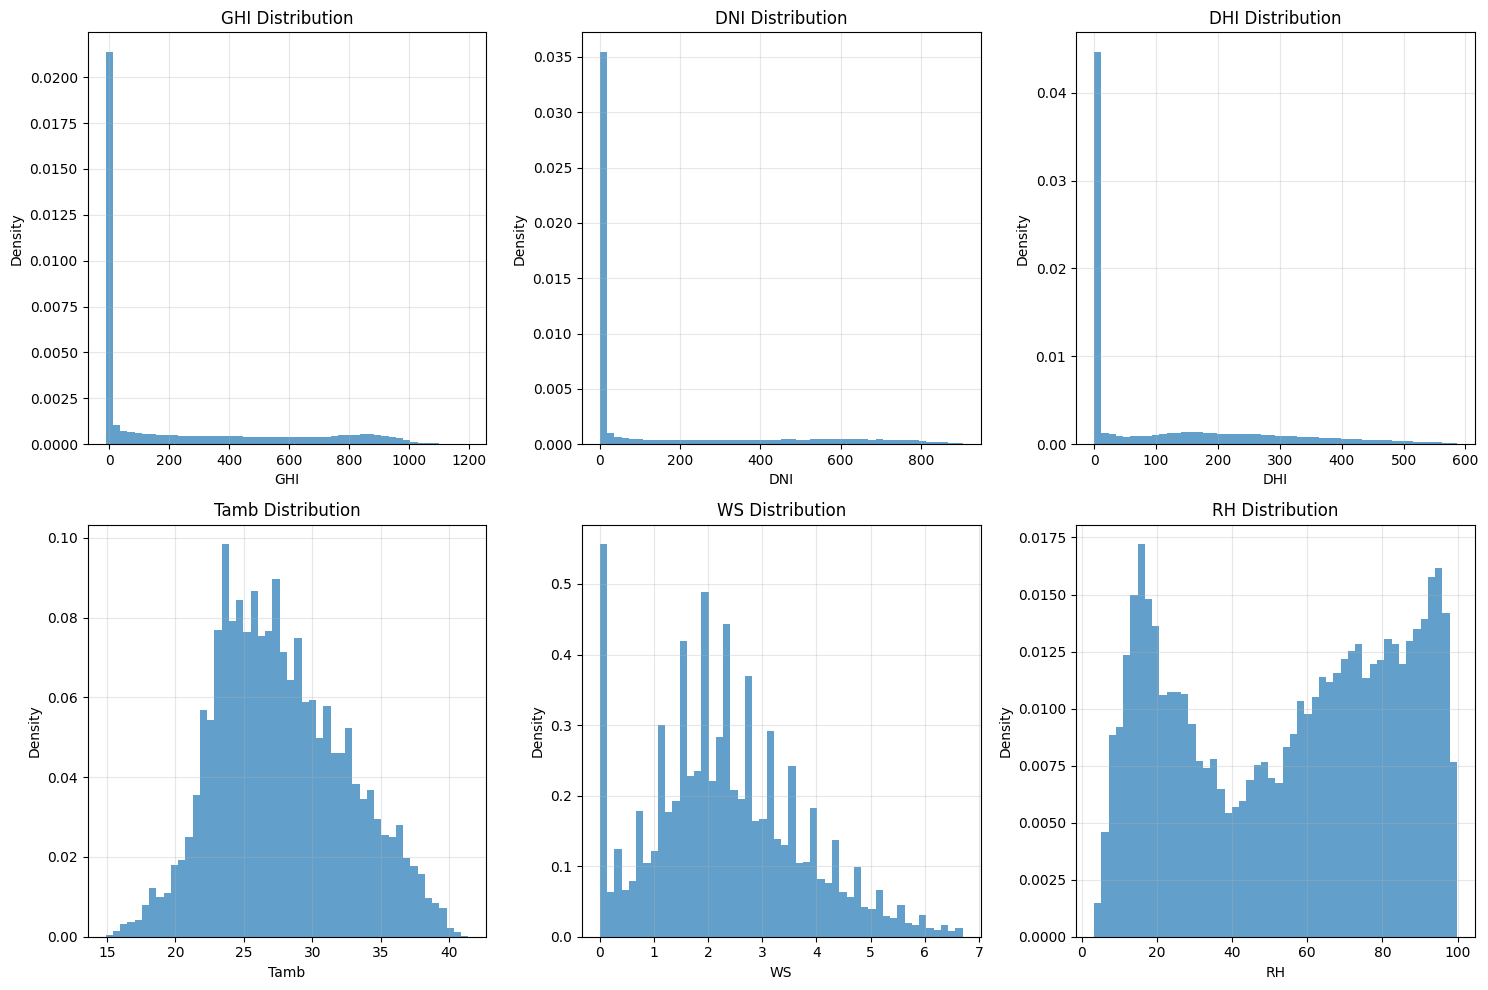

In [15]:
print("6. DISTRIBUTION ANALYSIS")

# Histograms for key metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

dist_metrics = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'RH']

for i, metric in enumerate(dist_metrics):
    axes[i].hist(df_clean[metric].dropna(), bins=50, alpha=0.7, density=True)
    axes[i].set_title(f'{metric} Distribution')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
print("7. DATA QUALITY SUMMARY")

# Calculate data quality metrics
original_count = len(df)
cleaned_count = len(df_clean.dropna(subset=numerical_cols))

print(f"• Original records: {original_count}")
print(f"• Cleaned records (complete cases): {cleaned_count}")
print(f"• Data retention: {(cleaned_count/original_count)*100:.2f}%")
print(f"• Outliers treated: {sum([info['count'] for info in outliers_report.values()])}")


7. DATA QUALITY SUMMARY
• Original records: 525600
• Cleaned records (complete cases): 525600
• Data retention: 100.00%
• Outliers treated: 8292


In [17]:
# Save cleaned data
df_clean.to_csv(r'C:\Users\admin\solar-challenge-week0\data\togo-dapaong_qc_cleaned.csv', index=False)
print(f"✅ Cleaned data saved to: ..data\togo-dapaong_qc_cleaned.csv")
print("ANALYSIS COMPLETE - Togo")

✅ Cleaned data saved to: ..data	ogo-dapaong_qc_cleaned.csv
ANALYSIS COMPLETE - Togo
